In [ ]:
#In this jupyter notebook, we aim to generate sentimental scores and categories with Kaggle dataset in order to be one of the features to predict the market of Bitcoin.

#Step 1: We need to first import some useful packages such as TextBlob, Vader, Seaborn and Pandas
##TextBlob and Vader are sentiment analyzers that we apply in our project
##We use Pandas to read csv file
##Seaborn can visualize our final result

#Step 2: Before running the code, we need to first download both csv files that are preprocessed before which are "preprocessed_tweets.csv" and "preprocessed_tweets_1000000.csv".

#Step 3: To run the code, press "Kernel" and select "Restart & Run All".

#Step 4: We can successfully see the plots show in jupyter notebook and save the new csv 


In [1]:
##Import useful packages and read the dataset from Kaggle
##We then use head(2) to show the front two tweets in the csv file

# Sentiment Analysis
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Plot
import seaborn as sns

import pandas as pd

#Data preparationpath
tweets = pd.read_csv('preprocessed_tweets.csv', encoding = 'utf-8')
#tweets = pd.read_csv('preprocessed_tweets_1000000.csv', encoding = 'utf-8')
tweets.head(2)

,timestamp,text
0,2019-05-27 11:49:06+00,Another Test tweet caught stream bitcoin
1,2019-05-27 11:49:22+00,Current Crypto Prices BTC 8721 99 USD ETH 266 ...


In [2]:
##Showing the data types of different columns

tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58634 entries, 0 to 58633
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  58634 non-null  object
 1   text       57654 non-null  object
dtypes: object(2)
memory usage: 916.3+ KB


In [3]:
##Checking if there exists null calue, if yes, remove them to prevent from errors

tweets['text'].isnull().sum()
tweets = tweets.dropna()
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57654 entries, 0 to 58633
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  57654 non-null  object
 1   text       57654 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


In [4]:
#convert to lower case
tweets['clean_text'] = tweets['text'].str.lower()

#delete unnecessary columns
#del tweets['timestamp']

tweets.head(2)

,timestamp,text,clean_text
0,2019-05-27 11:49:06+00,Another Test tweet caught stream bitcoin,another test tweet caught stream bitcoin
1,2019-05-27 11:49:22+00,Current Crypto Prices BTC 8721 99 USD ETH 266 ...,current crypto prices btc 8721 99 usd eth 266 ...


In [5]:
##Start running textblob analyzer and categorizing them with pos, neg, and neu

score = []
for text in tweets['clean_text']:
    blob = TextBlob(str(text))
    blob.sentiment
    score.append(round(blob.sentiment.polarity, 3))
    
tweets['textblob_score'] = [x for x in score]
tweets['textblob_category']  = ['positive' if score > 0
                                else 'negative' if score < 0
                                else 'neutral'
                                for score in tweets['textblob_score']]

In [6]:
##Showing new columns and details

tweets.head()

,timestamp,text,clean_text,textblob_score,textblob_category
0,2019-05-27 11:49:06+00,Another Test tweet caught stream bitcoin,another test tweet caught stream bitcoin,0.0,neutral
1,2019-05-27 11:49:22+00,Current Crypto Prices BTC 8721 99 USD ETH 266 ...,current crypto prices btc 8721 99 usd eth 266 ...,0.0,neutral
2,2019-05-27 11:49:23+00,Spiv Nosar Baz BITCOIN Is An Asset amp NOT A C...,spiv nosar baz bitcoin is an asset amp not a c...,0.0,neutral
3,2019-05-27 11:49:25+00,We building real bitcoin SV What building brok...,we building real bitcoin sv what building brok...,-0.1,negative
4,2019-05-27 11:49:32+00,CHANGE IS COMING GET READY Boom Another CB Jab...,change is coming get ready boom another cb jab...,0.2,positive


/Users/jolinchou/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


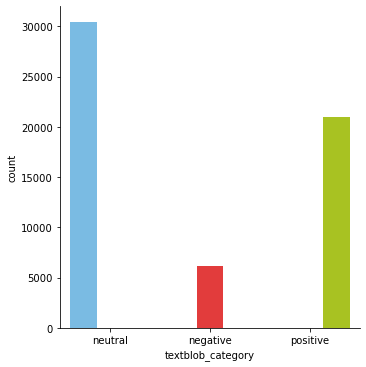

In [7]:
##Visualizing the textplot sentiment category with plots

fc = sns.factorplot(x="textblob_category", hue="textblob_category",
data=tweets, kind="count",
palette={"negative": "#FE2020",
"positive": "#BADD07",
"neutral": "#68BFF5"})

In [8]:
##Start running vader analyzer and categorizing them with pos, neg, and neu

analyser = SentimentIntensityAnalyzer()
score = []
for text in tweets['clean_text']:
    score.append(analyser.polarity_scores(text)['compound'])
#print(len(score))

tweets['vader_score'] = [x for x in score]
tweets['vader_category']  = ['positive' if score > 0.05
                                else 'negative' if score < -0.05
                                else 'neutral'
                                for score in tweets['vader_score']]

In [9]:
##Showing new columns and details

tweets.head()

,timestamp,text,clean_text,textblob_score,textblob_category,vader_score,vader_category
0,2019-05-27 11:49:06+00,Another Test tweet caught stream bitcoin,another test tweet caught stream bitcoin,0.0,neutral,0.0000,neutral
1,2019-05-27 11:49:22+00,Current Crypto Prices BTC 8721 99 USD ETH 266 ...,current crypto prices btc 8721 99 usd eth 266 ...,0.0,neutral,0.0000,neutral
2,2019-05-27 11:49:23+00,Spiv Nosar Baz BITCOIN Is An Asset amp NOT A C...,spiv nosar baz bitcoin is an asset amp not a c...,0.0,neutral,0.3612,positive
3,2019-05-27 11:49:25+00,We building real bitcoin SV What building brok...,we building real bitcoin sv what building brok...,-0.1,negative,-0.4767,negative
4,2019-05-27 11:49:32+00,CHANGE IS COMING GET READY Boom Another CB Jab...,change is coming get ready boom another cb jab...,0.2,positive,0.5248,positive


/Users/jolinchou/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


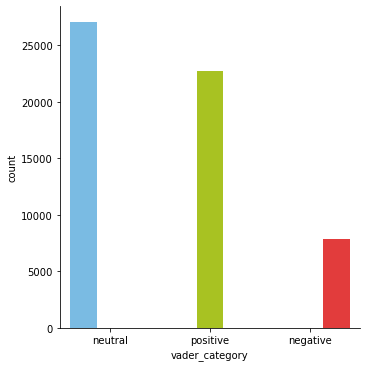

In [10]:
##Visualizing the vader sentiment category with plots

fc = sns.factorplot(x="vader_category", hue="vader_category",
data=tweets, kind="count",
palette={"negative": "#FE2020",
"positive": "#BADD07",
"neutral": "#68BFF5"})

In [11]:
##Saving a new csv file with sentiment analysis

tweets.to_csv('new_preprocessed_tweets.csv')